# Example of performing a linear least squares fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

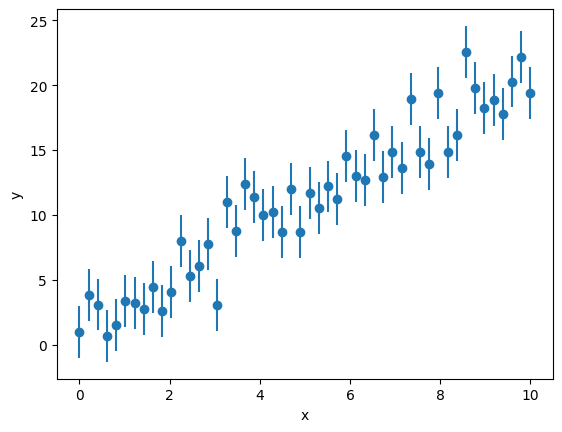

In [5]:
# set a random seed
np.random.seed(119)

# set the number of data points
npoints = 50

# set the x array
x = np.linspace(0, 10, npoints)

# set the slope and y-intercepts
m = 2
b = 1
sigma = 2

# generate y points
y = m * x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

# plot
plt.figure()
plt.errorbar(x, y, y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Starting with polyfit(), which fits data with polynomial of a degree n. A straight line is a polynomial of degree 1.

In [6]:
# perform the fit
# w is the 'weight' of each point. Small error = big weight and vice versa
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1/y_err))
print(m_fit, b_fit)

1.963404347039951 1.2830106812961934


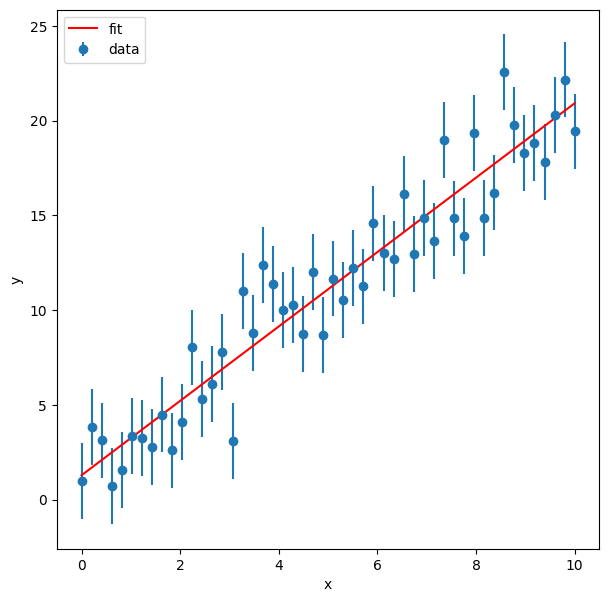

In [7]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, y_err, fmt='o', label='data')
plt.plot(x, m_fit * x + b_fit, 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

## Method 2: Scipy optimize

In [8]:
from scipy import optimize

In [10]:
def f_line(x, m, b):
    return x * m + b

In [11]:
# perform the fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err)

In [13]:
# params contains values of m and b that are the best fit
m_fit2 = params[0]
b_fit2 = params[1]

# params_cov contains information about how good the fit is
perr = np.sqrt(np.diag(params_cov))

# error on the parameters
m_fit2_err = perr[0]
b_fit2_err = perr[1]

print(f'The slope is {m_fit2:.5f} +- {m_fit2_err:.5f}')
print(f'The y-intercept is {b_fit2:.5f} +- {b_fit2_err:.5f}')

The slope is 1.96340 +- 0.08956
The y-intercept is 1.28301 +- 0.51971


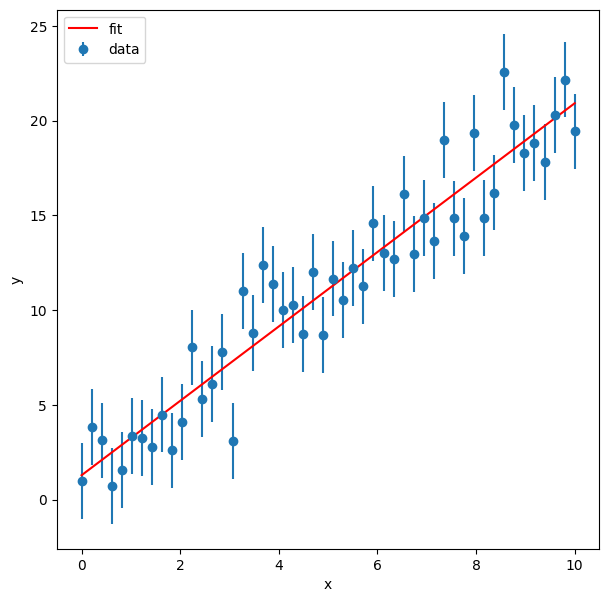

In [14]:
# plot scipy fit
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, y_err, fmt='o', label='data')
plt.plot(x, x * m_fit2 + b_fit2, 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()